# Analyse du diffractogramme du CaCN2
## Téléchargement des modules et des fichiers

In [1]:
import numpy as np
from mp_api.client import MPRester
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
mp_key = "wjMeCvxez5rqgsz8tYQIQIC7njLkvYiq"
mp_id = "mp-4124"

In [3]:
print("Téléchargement du fichier")
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
print("Téléchargement effectué avec succès")

Téléchargement du fichier


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement effectué avec succès


Nous allons analyser les 3 premiers pics du diffractogramme pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. Lorsqu'un rayonnement X incident est envoyé sur un cristal, le faisceau est diffracté à cause du réseau atmique. Il y a alors création d'interférences constructives et destructives. L’interférence sera constructive si et seulement si le vecteur d’onde k appartient au plan médiateur de la ligne joignant l’origine de l’espace réciproque au noeud K. Ce plan est appelé plan de Bragg. Les angles correspondant aux interférences constructives peuvent être trouvés grâce à la loi de Bragg ($2d_{hkl}sin(\theta)= n\lambda$), avec n l'ordre de la réflexion. L'intensité des pics de diffraction dépend du facteur de forme de l'atome et de la multiplicité des plans de réflexion. La distance entre deux plans (h k l) consécutifs du réseau direct est donnée par $d_{hkl} = \frac{2\pi}{|v|}$.

J'ai choisi de calculer les pics sur base de la maille conventionnelle afin de pouvoir comparer mes résultats avec ceux de Materials Project. 

A noter que pour les systèmes trigonaux, on utilise la convention hkli et non hkl, avec i = -(h+k).

In [4]:
xrd = XRDCalculator(1.54060)
pattern = xrd.get_pattern(conv_struc) 
hkil = pattern.hkls
d_hkl = pattern.d_hkls

## Premier pic de diffraction

In [5]:
print("Pic de diffraction n° 1 \n")
print('Angle de diffraction (2θ) =', str(round(pattern.x[0],4)),"[°]")
print('Intensité relative du pic =', str(round(pattern.y[0],4)))
print('Indices hkil = ', hkil[0][0]['hkl'])
print('Multiplicité = ', hkil[0][0]['multiplicity'])
print('Distance interplanaire =', str(round(d_hkl[0],4)), "[Å]")


Pic de diffraction n° 1 

Angle de diffraction (2θ) = 17.9461 [°]
Intensité relative du pic = 25.2521
Indices hkil =  (0, 0, 0, 3)
Multiplicité =  2
Distance interplanaire = 4.9388 [Å]


On remarque qu'il y a donc 2 plans cristallins identiques espacés de 4.93$[Å]$. 

## Deuxième pic de diffraction

In [6]:
print("Pic de diffraction n° 2 \n")
print('Angle de diffraction (2θ) =', str(round(pattern.x[1],4)),"[°]")
print('Intensité relative du pic =', str(round(pattern.y[1],4)))
print('Indices hkil = ', hkil[1][0]['hkl'])
print('Multiplicité = ', hkil[1][0]['multiplicity'])
print('Distance interplanaire =', str(round(d_hkl[1],4)), "[Å]")

Pic de diffraction n° 2 

Angle de diffraction (2θ) = 28.5287 [°]
Intensité relative du pic = 0.987
Indices hkil =  (1, 0, -1, 1)
Multiplicité =  12
Distance interplanaire = 3.1263 [Å]


On remarque qu'il y a donc 12 plans cristallins identiques espacés de 3.12$[Å]$. 

## Troisième pic de diffraction

In [7]:
print("Pic de diffraction n° 2 \n")
print('Angle de diffraction (2θ) =', str(round(pattern.x[2],4)),"[°]")
print('Intensité relative du pic =', str(round(pattern.y[2],4)))
print('Indices hkil = ', hkil[2][0]['hkl'])
print('Multiplicité = ', hkil[2][0]['multiplicity'])
print('Distance interplanaire =', str(round(d_hkl[2],4)), "[Å]")

Pic de diffraction n° 2 

Angle de diffraction (2θ) = 30.4173 [°]
Intensité relative du pic = 100.0
Indices hkil =  (1, 0, -1, 2)
Multiplicité =  12
Distance interplanaire = 2.9363 [Å]


Il y a 12 plans identiques espacés de 2.94$[Å]$.

## Graphique représentant les 3 pics de diffractions analysés

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

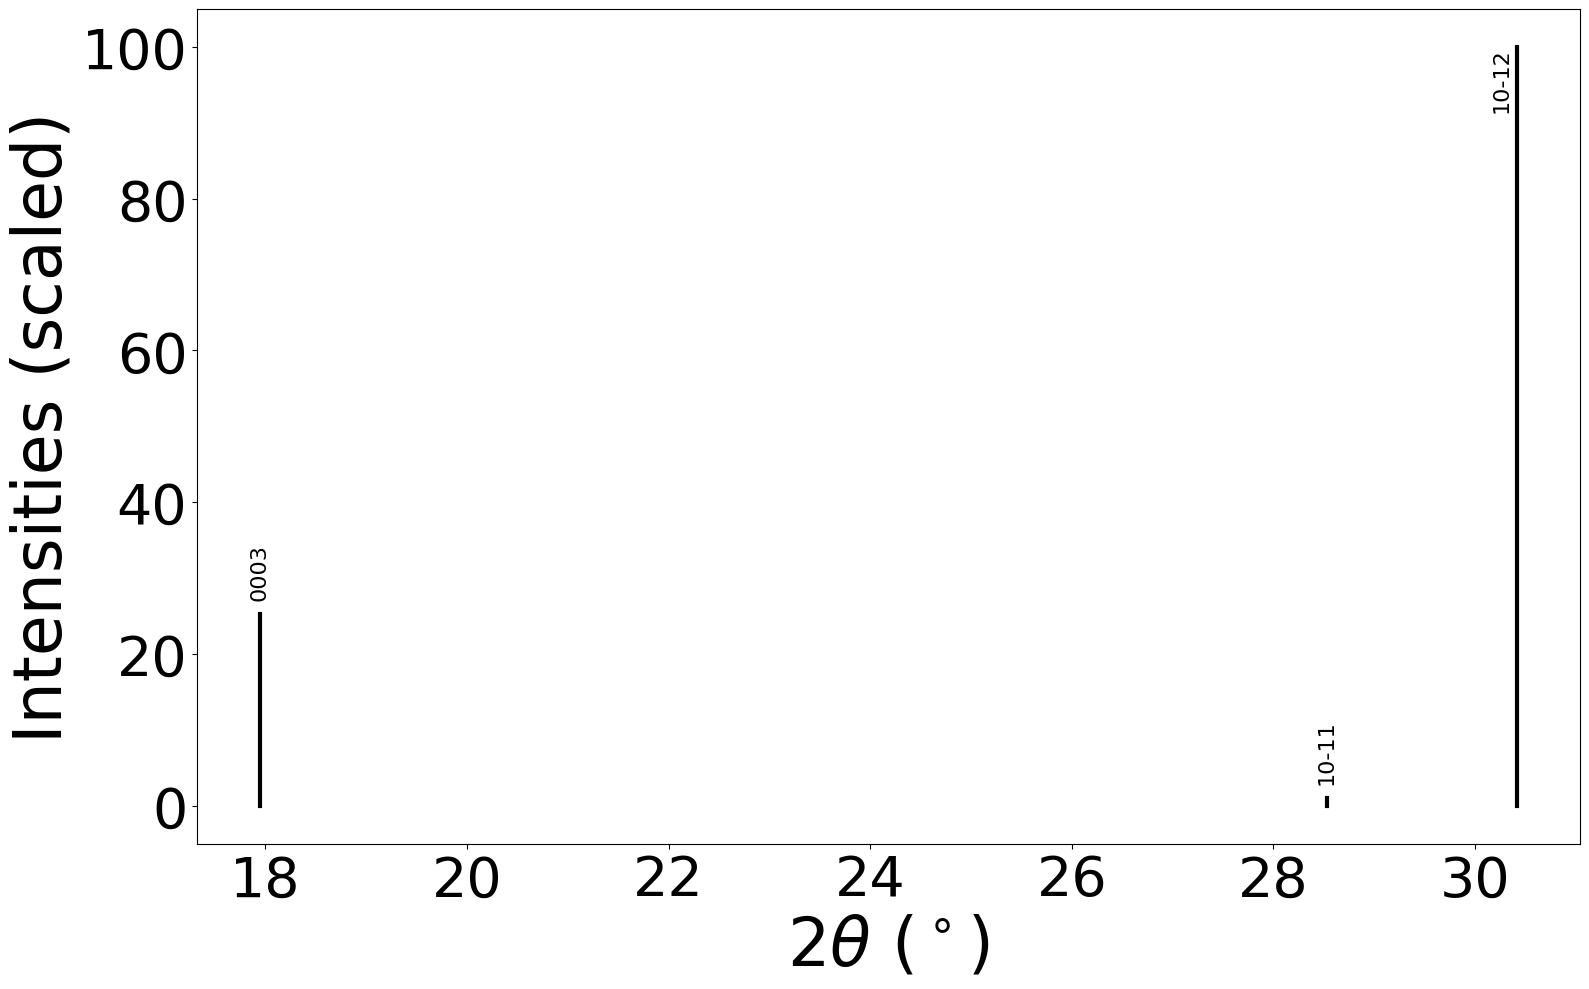

In [8]:
xrd.get_plot(conv_struc, two_theta_range=(0,35))

On voit bien les 3 premiers pics situés en 2$\theta$ = 17.9°, 28.5° et 30.4°. On remarque que l'intensité du troisième pic est bien plus importante que celle des autres pics. Le facteur de structure de la maille  Gardons à l'esprit que l'intensité est normalisée. 
On remarque alors que notre graphique représente bien les pics au même endroit et à la même intensité que celui disponible sur Materials project. 
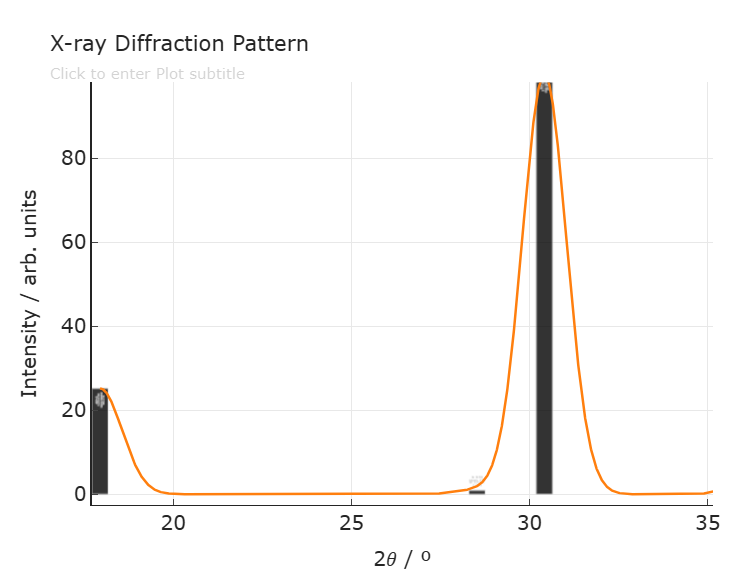